In [1]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
file='aggressive_dedup.json'
size = 40000
topsize = 300

seed1 = np.random.randint(size)
print(seed1)
#seed2 = np.random.randint(size)
today = datetime.date.today()

savestring = 'seed_' + str(seed1) + '_size_' + str(size) + '_topsize_' + str(topsize) + '_date_' + str(today)

if not os.path.exists(savestring):
    os.makedirs(savestring)

39729


2001 >>> 40000 [0.19 0.81]
2002 >>> 40000 [0.2 0.8]
2003 >>> 40000 [0.21 0.79]
2004 >>> 40000 [0.23 0.77]
2005 >>> 40000 [0.24 0.76]
2006 >>> 40000 [0.24 0.76]
2007 >>> 40000 [0.21 0.79]
2008 >>> 40000 [0.22 0.78]
2009 >>> 40000 [0.23 0.77]
2010 >>> 40000 [0.24 0.76]
2011 >>> 40000 [0.25 0.75]
2012 >>> 40000 [0.23 0.77]
2013 >>> 40000 [0.21 0.79]
2014 >>> 40000 [0.21 0.79]
['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'] [641057, 665193, 721220, 862542, 1192688, 1298316, 1959168, 2251645, 2884651, 3796743, 6044654, 11471413, 28000200, 19699868]


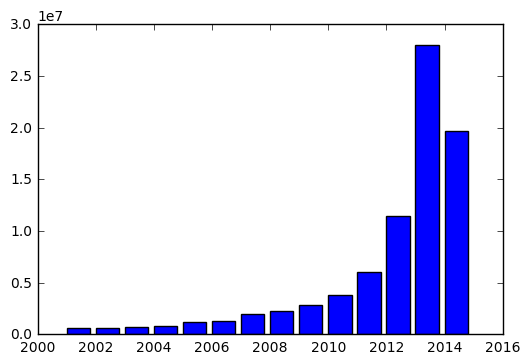

In [3]:
data, time, ratings, seen, indices = l.get_data(year='2001', size=size, limit=100000000)

l.save_file(savestring + '/indices.data', indices)
l.save_file(savestring + '/seen.data', seen)

l.simplify_ratings(data, ratings)
l.save_file(savestring + '/ratings.data', ratings)

#data2 = l.stopwords_filter(data)

l.selection_print(data, ratings)

x = sorted(list(data.keys()))
y = [seen.get(yr) for yr in x]
print(x, y)
plt.bar(x, y)
plt.show()
x = []
y = []

In [4]:
LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=300)
#LR = LogisticRegression(penalty='l1', n_jobs=-1, solver='saga', max_iter=100, class_weight='balanced')

CV = CountVectorizer(ngram_range=(1,2), analyzer='word', min_df=5) #, max_features=20000)

features = []
x = sorted(list(data.keys()))

In [5]:
for i, key in enumerate(x):
    LR, CV = l.predict_scores(data[key], ratings[key], CV, LR, i, key, savestring, features)
    
    if i == 0:
        top_f = [[x,[len(features)-i]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:(-topsize - 1):-1]
        bot_f = [[x,[i+1]] for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features)))][:topsize]
    else:
        for i, m in enumerate(top_f):
            top_f[i][1] += [len(features)-i for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]]
        for i, m in enumerate(bot_f):
            bot_f[i][1] += ([i+1 for i, (_,x) in enumerate(sorted(zip(LR.coef_[0],features))) if x == m[0]])

l.save_file(savestring + '/top_f.data', top_f)
l.save_file(savestring + '/bot_f.data', bot_f)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.873125
2001
f1: [0.62996719 0.92343667]
recall: [0.54926891 0.95238836]
precision: [0.73846154 0.89619327]

0.879
2002
f1: [0.66643694 0.92609559]
recall: [0.59913259 0.94973379]
precision: [0.7507764  0.90360548]

0.869125
2003
f1: [0.65250581 0.91938092]
recall: [0.59902498 0.93882686]
precision: [0.7164723 0.9007242]

0.855875
2004
f1: [0.6581678  0.90868773]
recall: [0.57963446 0.94281019]
precision: [0.76131687 0.87694895]

0.845625
2005
f1: [0.62450593 0.90284006]
recall: [0.54252509 0.93957753]
precision: [0.73567335 0.86886735]

0.858375
2006
f1: [0.65149185 0.91113028]
recall: [0.57305195 0.94408322]
precision: [0.75481112 0.88040018]

0.857125
2007
f1: [0.59482453 0.91327111]
recall: [0.50756201 0.94816449]
precision: [0.71832192 0.8808548 ]

0.852375
2008
f1: [0.61061655 0.90892265]
recall: [0.53005152 0.94242763]
precision: [0.72006221 0.8777182 ]

0.83675
2009
f1: [0.57542263 0.89894769]
recall: [0.48360656 0.94149109]
precision: [0.71027287 0.86008291]

0.847875
2010
f1

In [6]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in top_f])/len(top_f))

0.020942212934331673
0.017954799137698922
0.018227161172724573
0.018487062151370085
0.01763384897148394
0.017992064196606875
0.01708125084597503
0.01653347802812623
0.015642643264132446
0.015508910543082071
0.01558356786410096
0.015943295336534786
0.01580539996837593
0.014256910038691464


In [7]:
for i in range(len(x)):
    print(sum([1/x[1][i] for x in bot_f])/len(bot_f))

0.020942212934331673
0.017848232000516696
0.01798944715408696
0.018292100319323823
0.017673590561308586
0.01804255109535555
0.016985112474420756
0.016947256232876583
0.013486297101781555
0.01501405693687725
0.015982929364587704
0.01602967195221692
0.014158808896815133
0.011318458363269194


In [8]:
len(bot_f)

300

In [9]:
for i, m in enumerate(top_f):
    for j, n in enumerate(top_f[i][1]):
        if n > 1000:
            top_f[i][1][j] = 1000

slope:  0.22417582417582416


D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


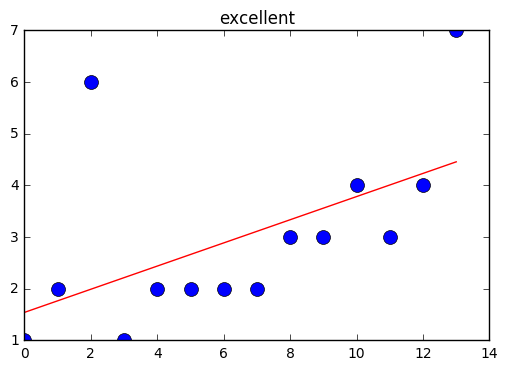

slope:  0.8021978021978021


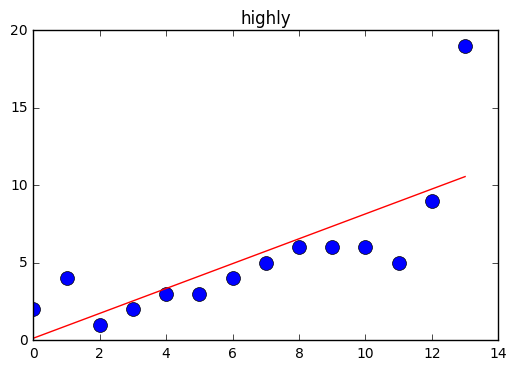

slope:  1.191208791208791


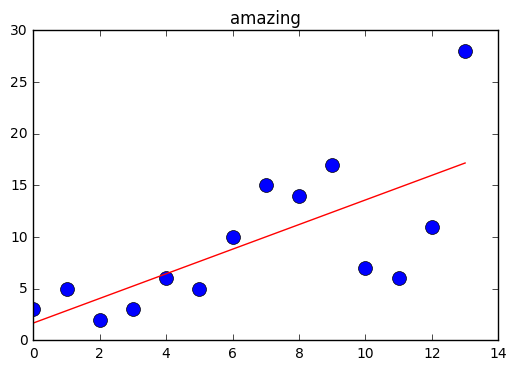

slope:  1.406593406593406


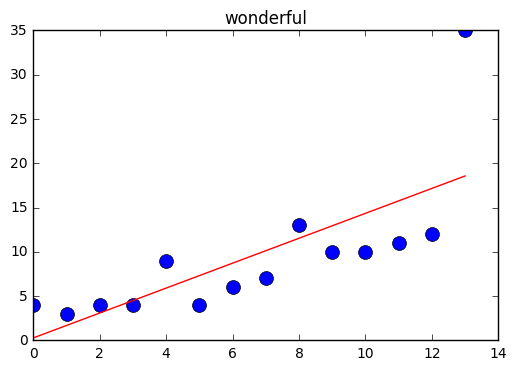

slope:  9.615384615384613


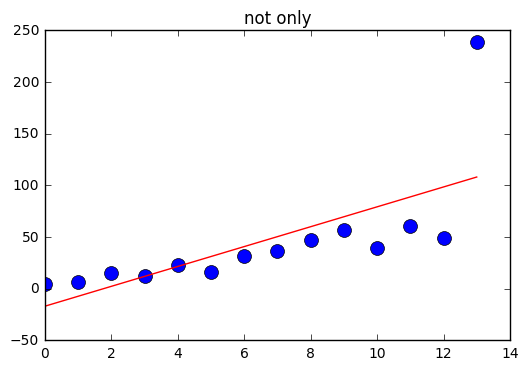

slope:  18.621978021978023


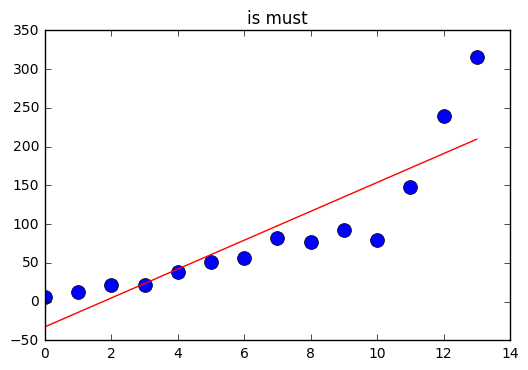

slope:  -0.4241758241758242


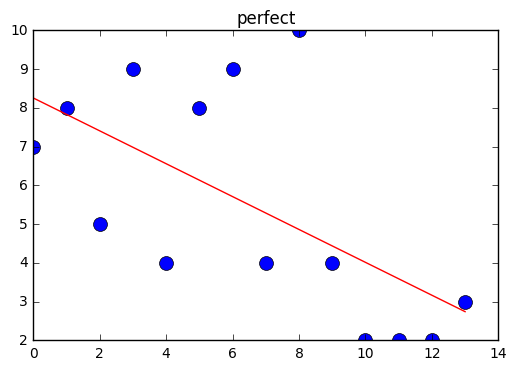

slope:  -0.36043956043955944


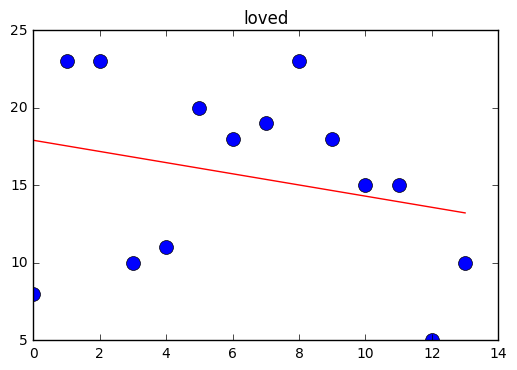

slope:  -1.3670329670329666


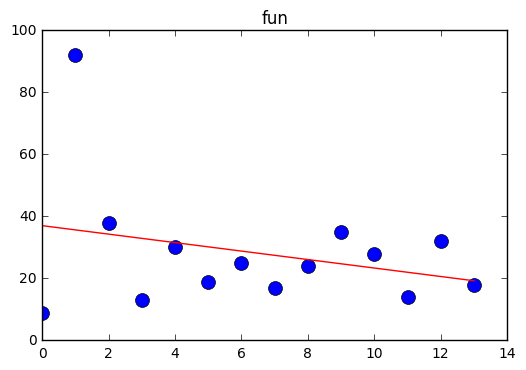

slope:  0.8527472527472524


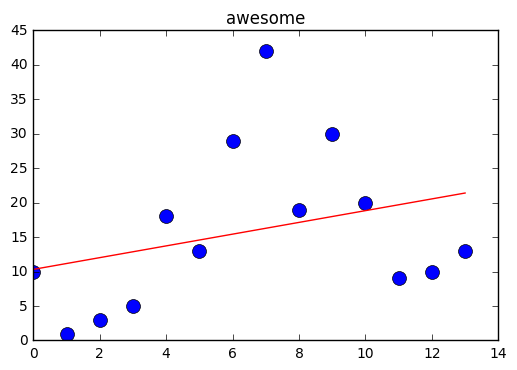

slope:  2.0725274725274736


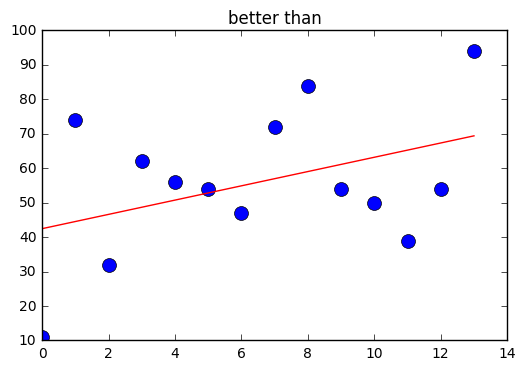

slope:  -1.1120879120879121


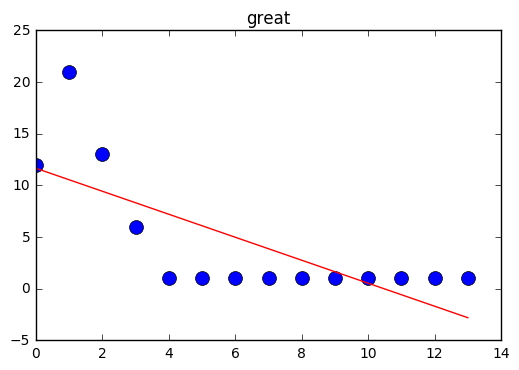

slope:  5.054945054945056


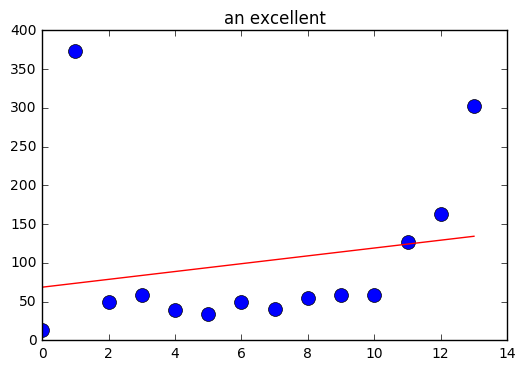

slope:  0.9890109890109886


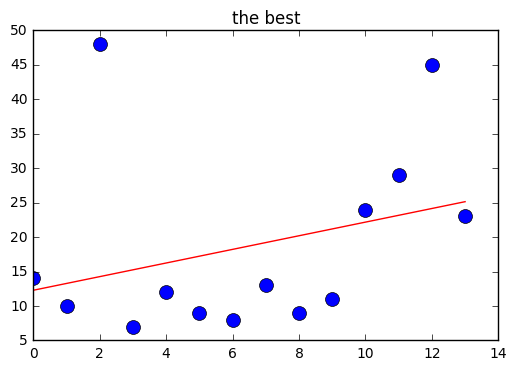

slope:  4.681318681318681


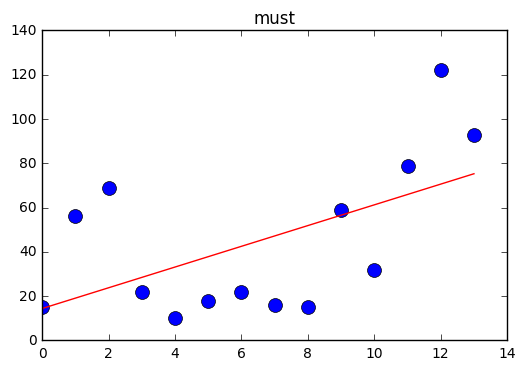

In [10]:
for i in range(15):
    temp = top_f[i][1]
    x = range(len(temp))
    y = temp
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    print('slope: ', m)
    plt.plot(x, y, 'o', label='Original data', markersize=10)
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.title(top_f[i][0])
    plt.show()